In [ ]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore", category=Warning)

In [ ]:
start_date = datetime(2020,1,1)
end_date = datetime(2024,12,31)
stock_symbol = 'GS'
stock = yf.download(stock_symbol, start_date, end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
stock = stock.dropna()
df = stock.xs('GS', axis = 1, level = 'Ticker')
df.columns = df.columns.str.lower()

In [ ]:
# Momentum Indicators

In [ ]:
# simple moving averages: returns a Series with name: SMA_10
sma10 = ta.sma(df['close'], length = 10)
df = df.merge(sma10, left_index = True, right_index = True)

# Calculate Relative Strength Index (RSI)
rsi = df.ta.rsi(length = 15)
df = df.merge(rsi, left_index = True, right_index=True)

# Calculate MACD
macd = df.ta.macd(fast = 5, slow = 20, signal = 9)
df = df.merge(macd, left_index = True, right_index = True)

# Calculate Bollinger Bands
bbands = df.ta.bbands(length = 10, std = 2)
df = df.merge(bbands, left_index=True, right_index=True)

# Calculate on-balance volume
obv = df.ta.obv(length = 10)
df = df.merge(obv, left_index=True, right_index=True)

In [ ]:
## Candlesticks

In [ ]:
inside_doji = df.ta.cdl_pattern(name=['inside', 'doji'])
df = df.merge(inside_doji, left_index=True, right_index=True)

In [ ]:
df.head(40)

,close,high,low,open,volume,SMA_10,RSI_15,MACD_5_20_9,MACDh_5_20_9,MACDs_5_20_9,BBL_10_2.0,BBM_10_2.0,BBU_10_2.0,BBB_10_2.0,BBP_10_2.0,OBV,CDL_INSIDE,CDL_DOJI_10_0.1
Date,,,,,,,,,,,,,,,,,,
2020-01-02,206.306213,206.587949,202.643553,203.383125,3736300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3736300.0,0,0.0
2020-01-03,203.893738,204.800596,202.766768,203.911350,2274500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1461800.0,-1,0.0
2020-01-06,205.980408,206.042045,202.053625,202.441010,3329300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4791100.0,0,0.0
2020-01-07,207.336304,209.343720,206.693568,206.904880,5255200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10046300.0,0,0.0
2020-01-08,209.334900,211.086993,207.327483,207.503570,3564700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13611000.0,0,0.0
2020-01-09,213.596313,214.300660,211.148673,212.486942,3980700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17591700.0,0,0.0
2020-01-10,213.164841,214.291811,212.530918,213.728326,2248100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15343600.0,-1,0.0
2020-01-13,215.894241,216.686638,213.948449,215.216294,3359200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18702800.0,0,0.0
2020-01-14,216.290466,218.808544,215.357195,215.991118,4302800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23005600.0,0,0.0


## OLS Regression

In [ ]:

data_raw = pd.read_csv('GS_FeatureMart_New.csv')

In [ ]:
data_raw = data_raw.dropna(subset=['Date'])

In [ ]:
data_raw.tail(20)

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,SP500,T10YIE,DEXUSUK,...,BAMLH0A0HYM2,AMERIBOR,T10Y2Y,DGS30,EFFR,SMA_10,RSI_15,BBL_10_2.0,BBP_10_2.0,OBV
1238,3/12/24,0.03,-0.79,-0.52,0.38,-0.09,0.017,5708.75,2.19,1.3282,...,3.36,5.28292,0.13,4.08,4.83,593.550116,67.419898,574.940950,0.649366,67469900.0
1239,4/12/24,0.70,-0.18,-1.24,-1.11,0.00,0.017,5709.54,2.21,1.3271,...,3.46,5.24259,0.16,4.14,4.83,595.559747,64.866297,581.274660,0.506864,65852600.0
1240,5/12/24,-0.28,-0.96,0.46,0.53,-0.11,0.017,5699.94,2.21,1.3114,...,3.44,5.28088,0.15,4.18,4.83,597.324866,63.407913,590.774537,0.235160,64179800.0
1241,6/12/24,0.35,0.41,-1.07,-1.11,-0.72,0.017,5751.07,2.23,1.3107,...,3.39,5.24063,0.05,4.26,4.83,597.972516,64.690441,593.354877,0.364493,65585500.0
1242,9/12/24,-0.74,0.41,0.15,0.74,-0.06,0.017,5695.94,2.27,1.3080,...,3.37,5.24063,0.04,4.30,4.83,597.406464,60.317518,591.246489,-0.004709,63952300.0
1243,10/12/24,-0.37,0.12,0.12,1.13,-0.68,0.017,5751.13,2.27,1.3093,...,3.32,5.24063,0.06,4.32,4.83,595.911151,53.931603,584.859101,-0.122861,61351500.0
1244,11/12/24,0.87,-0.22,-0.55,-0.07,-0.37,0.017,5792.04,2.29,1.3080,...,3.25,5.24063,0.07,4.34,4.83,594.920544,57.888660,583.575993,0.267096,63546800.0
1245,12/12/24,-0.63,-0.78,0.43,0.40,0.14,0.017,5780.05,2.33,1.3053,...,3.21,5.23324,0.11,4.38,4.83,593.842346,57.224239,582.384465,0.275199,62328400.0
1246,12/13/24,-0.05,-0.49,-0.31,0.26,-0.28,0.017,5815.03,2.33,1.3070,...,3.10,5.22980,0.13,4.39,4.83,591.843256,53.017296,580.207932,0.102412,61113400.0
1247,12/16/24,0.47,0.41,-1.03,-1.14,-0.91,0.017,5859.85,NaN,NaN,...,3.15,5.26738,NaN,NaN,NaN,590.312842,53.524918,578.683292,0.204378,62826700.0


In [ ]:
# Features
# X is your feature DataFrame
# load feature data
data_raw['Date'] = pd.to_datetime(data_raw['Date']) # set index to date
X_raw = data_raw.set_index('Date').fillna(method='bfill') # time-series data, preferrably using back-fill
X = pd.DataFrame(index = X_raw.index)

In [ ]:
# preprocess data using min-max scaler
for column in X_raw.columns:
     X[column] = (X_raw[column] - X_raw[column].min()) \
         / (X_raw[column].max() - X_raw[column].min())

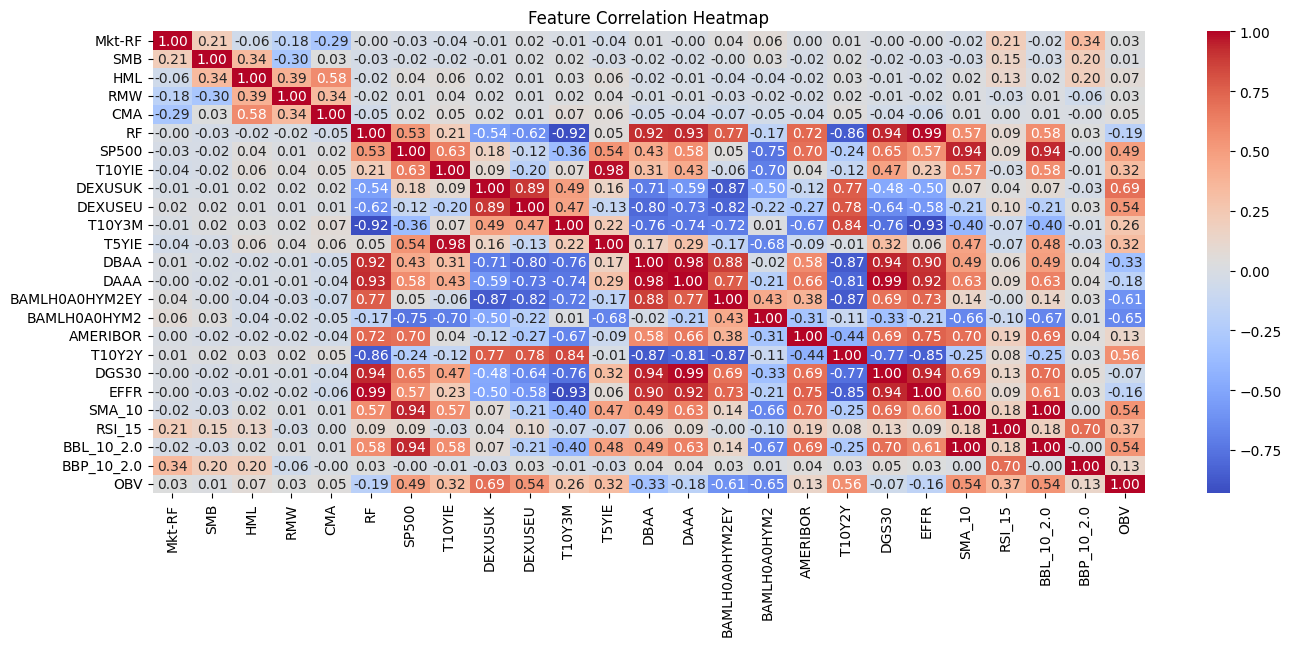

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
stock_symbol = 'GS'
stocks = yf.download(stock_symbol, start_date, end_date)
stock = stocks.xs(stock_symbol, axis = 1, level = 'Ticker')
price_type = 'Close'

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
y = stock[price_type]

In [ ]:
feature_target_correlation = X.corrwith(y.squeeze())
# print("Feature Correlation with Target:")
# print(feature_target_correlation)

# Sort features by their correlation with target
sorted_correlation = feature_target_correlation.abs().sort_values(ascending=False)

print("Feature Mean Correlation with Target (Sorted):")
print(sorted_correlation.mean())

# Print max and min correlation
print("\n Max Correlation:")
print(sorted_correlation.idxmax(), sorted_correlation.max())
print("\n Min Correlation:")
print(sorted_correlation.idxmin(), sorted_correlation.min())

Feature Mean Correlation with Target (Sorted):
0.4042493959142193

 Max Correlation:
SMA_10 0.946026028975933

 Min Correlation:
SMB 1.9497425292339174e-05


In [ ]:
X, y = X.align(y, join='inner', axis=0)
X = sm.add_constant(X)
benchmark_prep = sm.OLS(y,X).fit()
benchmark_prep.summary()
benchmark_select = X.columns[np.abs(benchmark_prep.tvalues)>=1.96]
x = X[benchmark_select]
benchmark = sm.OLS(y,x).fit()
print(benchmark.summary())
y_hat_benchmark1 = benchmark.predict(x)
corr_benchmark1 = ss.pearsonr(y_hat_benchmark1, y)[0]
print('benchmark: corr (Y, Y_pred) = '+str(corr_benchmark1))
print('hard-thresholding (p <= 0.05) selected ' +str(len(benchmark_select)) +' features: ', benchmark_select.values)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     826.1
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        03:39:18   Log-Likelihood:                -5296.8
No. Observations:                1103   AIC:                         1.062e+04
Df Residuals:                    1089   BIC:                         1.069e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.8474     10.116      7.201      0.0

# **-- Candidate Models --**

In [ ]:
data_raw = pd.read_csv('GS_FeatureMart_New.csv')

# Prepare features
data_raw['Date'] = pd.to_datetime(data_raw['Date'])
X_raw = data_raw.set_index('Date')

stocks = yf.download(stock_symbol, start=X_raw.index.min(), end=X_raw.index.max())

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Calculate log returns
stocks['log_return'] = np.log(stocks['Close'] / stocks['Close'].shift(1))

X_cm = pd.DataFrame(index=X_raw.index)
for column in X_raw.columns:
    if X_raw[column].dtype in [np.float64, np.int64]:  # Only scale numeric columns
        X_cm[column] = (X_raw[column] - X_raw[column].min()) / (X_raw[column].max() - X_raw[column].min())
    else:
        X_cm[column] = X_raw[column]

# Align indices
common_dates = stocks.index.intersection(X_cm.index)
stocks = stocks.loc[common_dates]
X_cm = X_cm.loc[common_dates]

In [ ]:
# Check for any columns with all NaN values
nan_cols = X_cm.columns[X_cm.isna().all()].tolist()
if nan_cols:
    print("\nColumns with all NaN values:", nan_cols)
    X_cm = X_cm.drop(columns=nan_cols)

In [ ]:
# Function to analyze hard threshold significance
def analyze_hard_threshold(model, threshold=0.05):
    significant_features = []
    pvalues = model.pvalues[1:]  # Exclude constant
    feature_names = model.model.exog_names[1:]  # Exclude constant

    print("\nHard Threshold Analysis (p < 0.05):")
    print("Feature\t\tP-value\tSignificant")
    print("-" * 40)

    for feature, pvalue in zip(feature_names, pvalues):
        is_significant = pvalue < threshold
        significant_features.append(feature) if is_significant else None
        print(f"{feature:<15} {pvalue:.4f}\t{'✓' if is_significant else '✗'}")

    print(f"\nTotal significant features: {len(significant_features)}/{len(pvalues)}")
    print("Significant features:", significant_features)
    return significant_features

In [ ]:
# Candidate Model functions
# CAPM Model
def capm_augmented_model(X_cm, stocks):
    try:
        X = pd.DataFrame(index=X_cm.index)
        for col in ['Mkt-RF', 'T10Y2Y', 'DEXUSEU', 'RF']:
            if col in X_cm.columns:
                X[col] = X_cm[col]
            else:
                print(f"Warning: Column {col} not found in data")

        y = stocks['log_return']

        valid_mask = ~(X.isna().any(axis=1) | y.isna())
        X = X.loc[valid_mask]
        y = y.loc[valid_mask]

        if len(X) == 0 or len(y) == 0:
            print("No valid data after cleaning")
            return None

        print(f"Final data shape: X: {X.shape}, y: {y.shape}")

        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()

        significant_features = analyze_hard_threshold(model)

        return model, X, y, significant_features
    except Exception as e:
        print(f"Error in CAPM model: {str(e)}")
        return None

In [ ]:
# FAMA-FRENCH Model
def fama_french_technical_model(X_cm, stocks):
    try:
        X = pd.DataFrame(index=X_cm.index)
        for col in ['Mkt-RF', 'HML', 'SMB', 'RSI_15', 'OBV']:
            if col in X_cm.columns:
                X[col] = X_cm[col]
            else:
                print(f"Warning: Column {col} not found in data")

        y = stocks['log_return']

        valid_mask = ~(X.isna().any(axis=1) | y.isna())
        X = X.loc[valid_mask]
        y = y.loc[valid_mask]

        if len(X) == 0 or len(y) == 0:
            print("No valid data after cleaning")
            return None

        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()

        significant_features = analyze_hard_threshold(model)

        return model, X, y, significant_features
    except Exception as e:
        print(f"Error in Fama-French model: {str(e)}")
        return None

In [ ]:
# Augmented AR(1) Model
def augmented_ar1_model(X_cm, stocks):
    try:
        X = pd.DataFrame(index=X_cm.index)
        X['Returns_lag1'] = stocks['log_return'].shift(1)

        for col in ['BBP_10_2.0', 'BAMLH0A0HYM2']:
            if col in X_cm.columns:
                X[col] = X_cm[col]
            else:
                print(f"Warning: Column {col} not found in data")

        y = stocks['log_return']

        valid_mask = ~(X.isna().any(axis=1) | y.isna())
        X = X.loc[valid_mask]
        y = y.loc[valid_mask]

        if len(X) == 0 or len(y) == 0:
            print("No valid data after cleaning")
            return None

        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()

        significant_features = analyze_hard_threshold(model)

        return model, X, y, significant_features
    except Exception as e:
        print(f"Error in AR(1) model: {str(e)}")
        return None

In [ ]:
# Kalman Filter Model
def kalman_filter_model(X_cm, stocks):
    try:
        X = pd.DataFrame(index=X_cm.index)
        for col in ['Mkt-RF', 'RSI_15', 'SMA_10']:
            if col in X_cm.columns:
                X[col] = X_cm[col]
            else:
                print(f"Warning: Column {col} not found in data")

        y = stocks['log_return']

        valid_mask = ~(X.isna().any(axis=1) | y.isna())
        X = X.loc[valid_mask]
        y = y.loc[valid_mask]

        if len(X) == 0 or len(y) == 0:
            print("No valid data after cleaning")
            return None

        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()

        significant_features = analyze_hard_threshold(model)

        return model, X, y, significant_features
    except Exception as e:
        print(f"Error in Kalman Filter model: {str(e)}")
        return None

In [ ]:
print("\nAvailable columns in X_cm:")
print(X_cm.columns.tolist())


Available columns in X_cm:
['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'SP500', 'T10YIE', 'DEXUSUK', 'DEXUSEU', 'T10Y3M', 'T5YIE', 'DBAA', 'DAAA', 'BAMLH0A0HYM2EY', 'BAMLH0A0HYM2', 'AMERIBOR', 'T10Y2Y', 'DGS30', 'EFFR', 'SMA_10', 'RSI_15', 'BBL_10_2.0', 'BBP_10_2.0', 'OBV']


In [ ]:
models = {}
model_functions = {
    'CAPM Augmented': capm_augmented_model,
    'Fama-French Technical': fama_french_technical_model,
    'Augmented AR(1)': augmented_ar1_model,
    'Kalman Filter': kalman_filter_model
}

threshold_results = pd.DataFrame(columns=['Model', 'Total Features', 'Significant Features', 'Significant Features List'])

for name, func in model_functions.items():
    print(f"\nFitting {name} model...")
    result = func(X_cm, stocks)
    if result is not None:
        model, X, y, significant_features = result
        models[name] = (model, X, y)

        # Store threshold results
        threshold_results.loc[len(threshold_results)] = [
            name,
            len(model.pvalues) - 1,  # Exclude constant
            len(significant_features),
            significant_features
        ]

# Print threshold analysis summary
print("\nThreshold Analysis Summary:")
print(threshold_results)


Fitting CAPM Augmented model...
Final data shape: X: (1053, 4), y: (1053,)

Hard Threshold Analysis (p < 0.05):
Feature		P-value	Significant
----------------------------------------
Mkt-RF          0.0000	✓
T10Y2Y          0.1739	✗
DEXUSEU         0.4935	✗
RF              0.1435	✗

Total significant features: 1/4
Significant features: ['Mkt-RF']

Fitting Fama-French Technical model...

Hard Threshold Analysis (p < 0.05):
Feature		P-value	Significant
----------------------------------------
Mkt-RF          0.0000	✓
HML             0.0000	✓
SMB             0.4832	✗
RSI_15          0.0527	✗
OBV             0.5357	✗

Total significant features: 2/5
Significant features: ['Mkt-RF', 'HML']

Fitting Augmented AR(1) model...

Hard Threshold Analysis (p < 0.05):
Feature		P-value	Significant
----------------------------------------
Returns_lag1    0.0000	✓
BBP_10_2.0      0.0000	✓
BAMLH0A0HYM2    0.4275	✗

Total significant features: 2/3
Significant features: ['Returns_lag1', 'BBP_10_2.0']

Fit

In [ ]:
if models:
    # Print results and compare models
    for name, (model, X, y) in models.items():
        print(f"\n=== {name} Model ===")
        print(f"Number of observations: {len(y)}")
        print("\nModel Coefficients:")
        print(model.summary().tables[1])
        print(f"\nModel Performance:")
        print(f"R-squared: {model.rsquared:.4f}")
        print(f"Adj. R-squared: {model.rsquared_adj:.4f}")

        y_hat = model.predict(X)
        corr = ss.pearsonr(y_hat, y)[0]
        print(f'Correlation (Y, Y_pred): {corr:.4f}')


=== CAPM Augmented Model ===
Number of observations: 1053

Model Coefficients:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0971      0.006    -16.989      0.000      -0.108      -0.086
Mkt-RF         0.1664      0.009     19.411      0.000       0.150       0.183
T10Y2Y         0.0076      0.006      1.361      0.174      -0.003       0.018
DEXUSEU       -0.0029      0.004     -0.685      0.493      -0.011       0.005
RF             0.0040      0.003      1.464      0.144      -0.001       0.009

Model Performance:
R-squared: 0.2665
Adj. R-squared: 0.2637
Correlation (Y, Y_pred): 0.5163

=== Fama-French Technical Model ===
Number of observations: 1090

Model Coefficients:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1178      0.

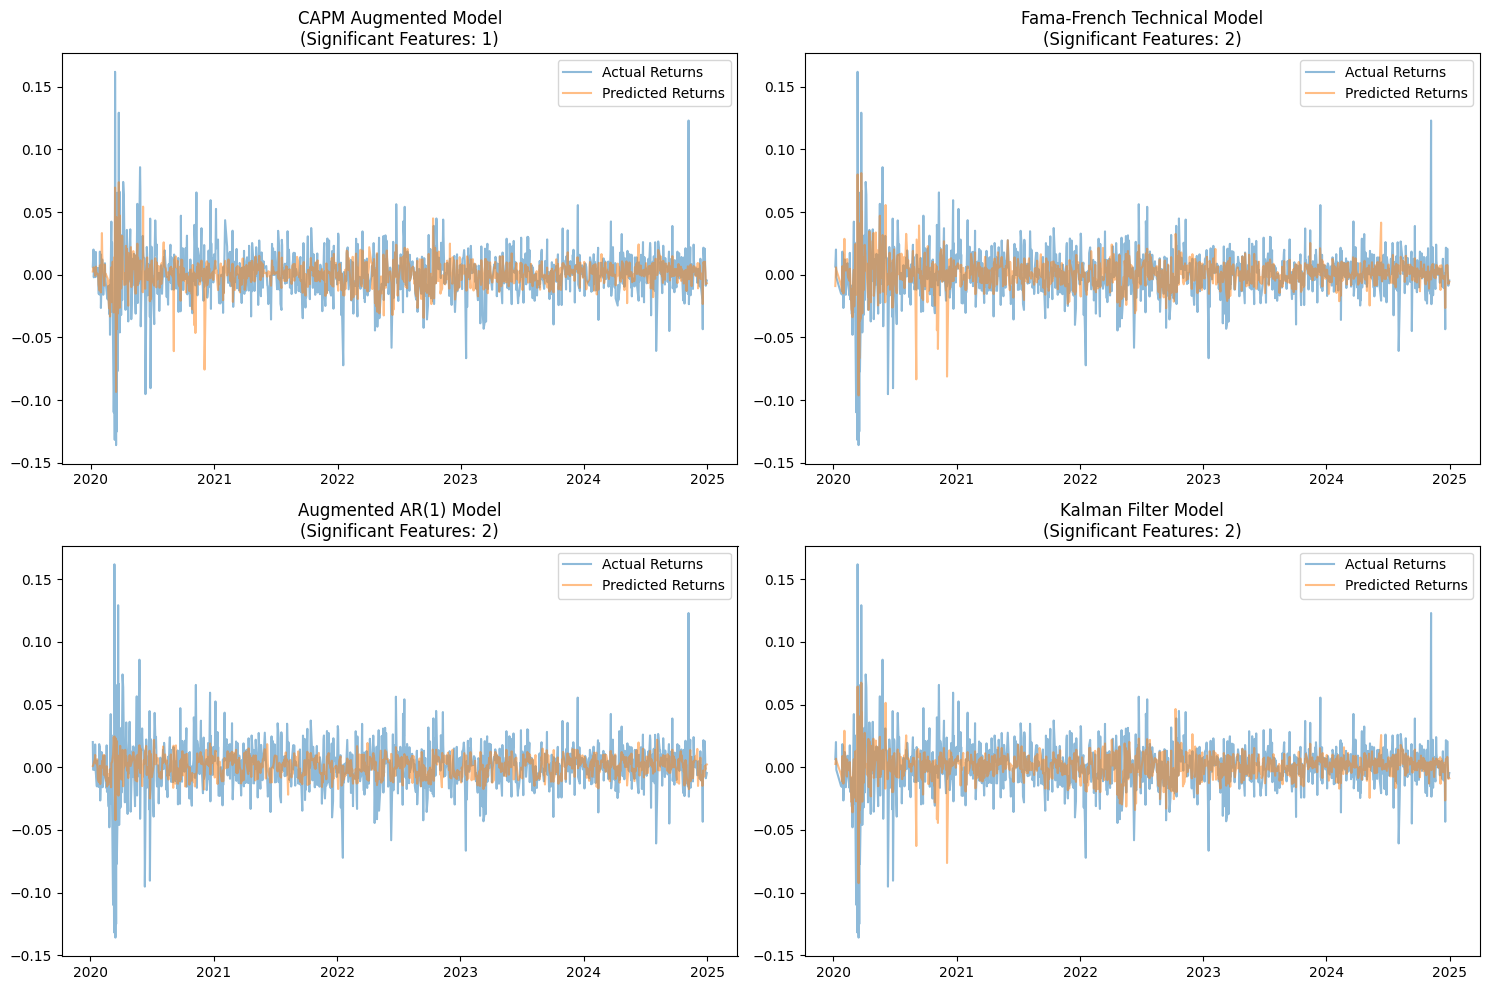

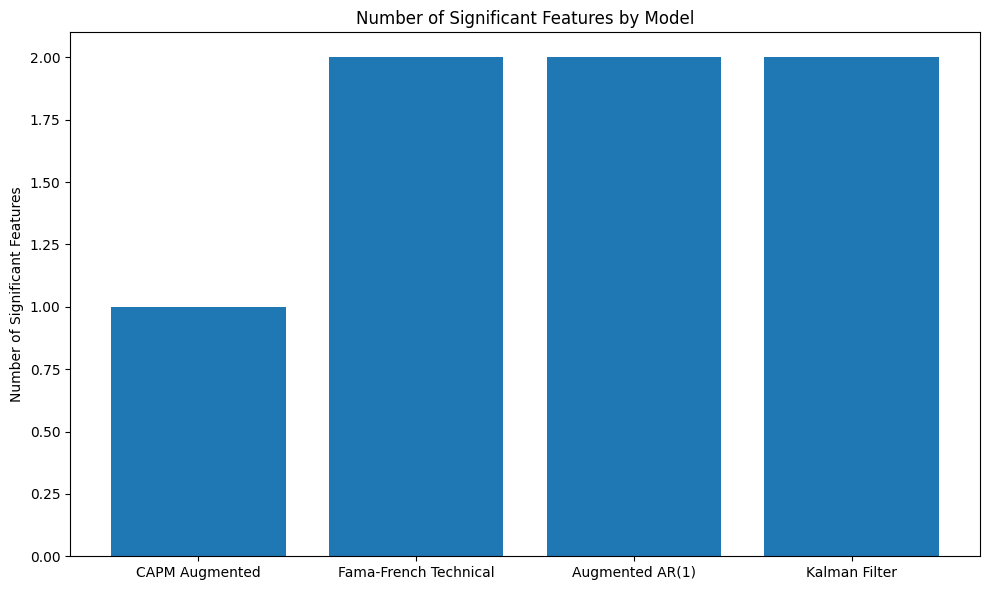

In [ ]:
# Visualizations
if models:
    # Plotting
    plt.figure(figsize=(15, 10))
    for i, (name, (model, X, y)) in enumerate(models.items(), 1):
        plt.subplot(2, 2, i)
        y_pred = model.predict(X)
        plt.plot(y.index, y, label='Actual Returns', alpha=0.5)
        plt.plot(y.index, y_pred, label='Predicted Returns', alpha=0.5)
        plt.title(f'{name} Model\n(Significant Features: {threshold_results.loc[threshold_results["Model"]==name, "Significant Features"].iloc[0]})')
        plt.legend()
        plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Create bar plot of significant features by model
    plt.figure(figsize=(10, 6))
    plt.bar(threshold_results['Model'], threshold_results['Significant Features'])
    plt.title('Number of Significant Features by Model')
    plt.xticks(rotation=0)
    plt.ylabel('Number of Significant Features')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo models were successfully fitted.")